<a href="https://colab.research.google.com/github/dolly1008/Text-analysis-project/blob/main/Interative_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import re
import nltk

In [ ]:
# impurities that our text can have
# max , MAX  , MaX, maxxxxxxxxxxx


In [ ]:
!pip install requests

In [ ]:
# Download resources if not already available
def clean_text(text):
    text = text.lower()   #  Lowercase conversion
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # URL removal
    text = re.sub(r'<.*?>', '', text) # HTML tag removal
    text = re.sub(r'[^a-z\s]', '', text) # Special character removal
    text = re.sub(r'\s+', ' ', text).strip() # Extra whitespace removal   #strip to remove forward or backward spcaes
    text = re.sub(r'\S+@\S+\.\S+', '', text) # email removal
    text = re.sub(r'[^\w\s]', '', text) # punctuations
    text = re.sub(r'(.)\1{2,}', r'\1', text) # Repeated Characters / Elongated Words
    text = re.sub(r'#', '', text) # Hashtags (like from Twitter/Instagram)
    text= re.sub(r'@\w+', '', text) # Mention username
    text= re.sub(r'[^\x00-\x7F]+', '', text) # non ASCII characters (emojis , foreign characters)
    return text

In [ ]:
dirty_text = """
<Review>OMG!!! 😱 I Loooove the NEW Phone Max 13 Pro+++... it's amaaaazinggg!!! 😍😍😍
Visit https://www.phone-world.com/product?id=123 or check www.tech-deals.net 😎📱
Seriously, best purchase ever (even though it cost me $1,299.99)!!!
Customer support was gr8! Contacted them via email: support@phone-world.com & got a reply within 2 hrs.
Follow them @PhoneWorldOfficial for #deals and more info!!
P.S. -- I had to return the case [wrong size] but the process was smooth.
    TOO     MANY     SPACES here     lol 😂😂
</Review>
"""

In [ ]:
cleaned= clean_text(dirty_text)

In [ ]:
cleaned

'omg i love the new phone max pro its amazing visit or check seriously best purchase ever even though it cost me customer support was gr contacted them via email supportphoneworldcom got a reply within hrs follow them phoneworldofficial for deals and more info ps i had to return the case wrong size but the process was smooth too many spaces here lol'

In [ ]:
# LEMMITIZING USING SPACY
!pip  install spacy
!python - m spacy download en_core_web_sm

Python 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [ ]:
import spacy
# lemmatize using spacy
def clean_text_spacy(text):
    nlp= spacy.load("en_core_web_sm")
    doc= nlp(text)
    word=[]
    for token in doc:
        if not token.is_stop and not token.is_punct:
            word.append(token.lemma_)
    return word

In [ ]:
clean_text_spacy(cleaned)

['omg',
 'love',
 'new',
 'phone',
 'max',
 'pro',
 'amazing',
 'visit',
 'check',
 'seriously',
 'good',
 'purchase',
 'cost',
 'customer',
 'support',
 'gr',
 'contact',
 'email',
 'supportphoneworldcom',
 'get',
 'reply',
 'hrs',
 'follow',
 'phoneworldofficial',
 'deal',
 'info',
 'ps',
 'return',
 'case',
 'wrong',
 'size',
 'process',
 'smooth',
 'space',
 'lol']

# word cloud

In [ ]:
text="""
These headphones are amazing! Great sound quality and super comfortable. I use them at the gym daily
            Battery life is fantastic—lasts me for days! Also love the sleek design and fast pairing
The noise cancellation is top-notch. Blocks out everything when I'm working.
            Very lightweight and doesn’t hurt my ears after long use. Excellent for video calls.
I love how quick they connect to my phone. The bass is powerful too.
            Perfect for travel. They fold nicely and the carrying case is a great addition.
Great product at a reasonable price. Feels like a premium experience.
            Customer service was excellent when I had a question about charging. Very responsive
Best headphones I’ve owned. Better than some high-end brands.
            Looks stylish and professional. I wear them to work every day."""

In [ ]:
cleaned_1= clean_text(text)
cleaned_1= clean_text_spacy(cleaned_1)

In [ ]:
cleaned_1

['headphone',
 'amazing',
 'great',
 'sound',
 'quality',
 'super',
 'comfortable',
 'use',
 'gym',
 'daily',
 'battery',
 'life',
 'fantasticlast',
 'day',
 'love',
 'sleek',
 'design',
 'fast',
 'pair',
 'noise',
 'cancellation',
 'topnotch',
 'block',
 'm',
 'work',
 'lightweight',
 'not',
 'hurt',
 'ear',
 'long',
 'use',
 'excellent',
 'video',
 'call',
 'love',
 'quick',
 'connect',
 'phone',
 'bass',
 'powerful',
 'perfect',
 'travel',
 'fold',
 'nicely',
 'carrying',
 'case',
 'great',
 'addition',
 'great',
 'product',
 'reasonable',
 'price',
 'feel',
 'like',
 'premium',
 'experience',
 'customer',
 'service',
 'excellent',
 'question',
 'charge',
 'responsive',
 'good',
 'headphone',
 've',
 'own',
 'well',
 'highend',
 'brand',
 'look',
 'stylish',
 'professional',
 'wear',
 'work',
 'day']

In [ ]:
from wordcloud import WordCloud

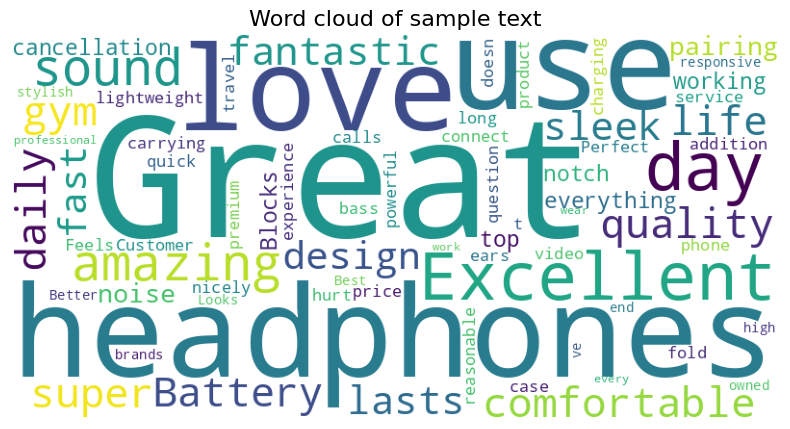

In [ ]:
wordcloud= WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word cloud of sample text", fontsize=16)
plt.show()

In [ ]:
def show_wordcloud(text):
    try:
        wordcloud= WordCloud(width=800, height=400, background_color="white").generate(text)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud)
        plt.axis("off")
        return plt
    except Exception as e:
        return f"Erroe generating word cloud:m {e}"

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

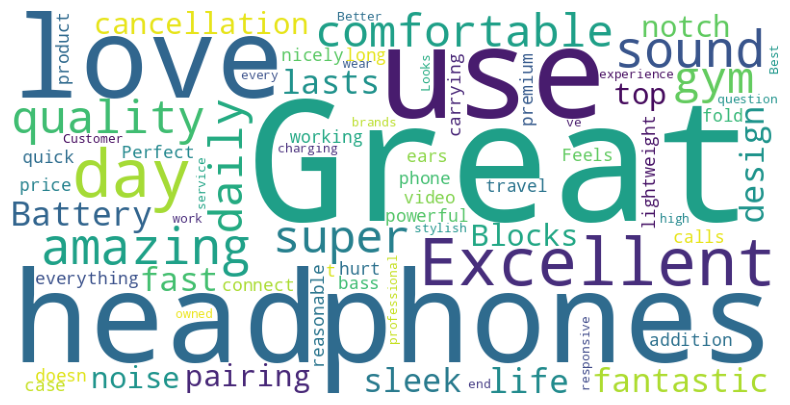

In [ ]:
show_wordcloud(text)

# N-GRAM ANALYSIS

In [ ]:
from nltk.util import ngrams
from collections import Counter
import plotly.graph_objects as go

In [ ]:
# create an bigram
biagrams= list(ngrams(cleaned_1, 3))
Counter(biagrams)
biagram_counts= Counter(biagrams).most_common(15)

In [ ]:
labels=[]
counts=[]


for biagram , count in biagram_counts:
    labels.append(" ".join(biagram))
    counts.append(count)


In [ ]:
labels

['headphone amazing great',
 'amazing great sound',
 'great sound quality',
 'sound quality super',
 'quality super comfortable',
 'super comfortable use',
 'comfortable use gym',
 'use gym daily',
 'gym daily battery',
 'daily battery life',
 'battery life fantasticlast',
 'life fantasticlast day',
 'fantasticlast day love',
 'day love sleek',
 'love sleek design']

In [ ]:
counts=[3,5,6,7,9,10,23,12,11,22,10,5,13,14,15]

In [ ]:
# plotly bar chart
fig= go.Figure(data=
               [go.Bar(
                   x=labels,
                   y=counts,
                   text=counts,
                   textposition="outside")])




# update layout
fig.update_layout(height=550,
                  title="top 15 Biagrams",
                  xaxis_title= "Labels",
                  yaxis_title="Frequency")


fig.show()

In [ ]:
# Creating function for N-gram analysis
def plot_top_ngrams_bar_chart(tokens,gram_n=4, top_n=15):
    try:
        ngram = list(ngrams(tokens, gram_n))
        ngram_counts= Counter(ngram).most_common(top_n)

        if not ngram_counts:
            raise ValueError("No n-gramsfound in the given  token list")

        labels=[]
        counts=[]
        for biagram , count in ngram_counts :
            labels.append(" ".join(biagram))
            counts.append(count)

        # plotly bar chart
        fig= go.Figure(data=
                       [go.Bar(
                           x=labels,
                           y=counts,
                           text=counts,
                           textposition="outside")])




        # update layout
        fig.update_layout(height=550,
                          title="top 15 Biagrams",
                          xaxis_title= "Labels",
                          yaxis_title="Frequency")


        fig.show()
    except Exception as e:
        print(f"An Error Occured: {e}")

In [ ]:
plot_top_ngrams_bar_chart(cleaned_1)

# EMOTION  DETECTION.

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
model_name= "nateraw/bert-base-uncased-emotion"

emotion_classifier= pipeline("text-classification", model=model_name, tokenizer=model_name, top_k=3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
text="I love India, I am proud Indian"
results= emotion_classifier(text)
results[0]


[{'label': 'joy', 'score': 0.9940181970596313},
 {'label': 'love', 'score': 0.0026790183037519455},
 {'label': 'anger', 'score': 0.0015130413230508566}]

In [ ]:
import plotly.express as px
# Creating function for emotion detection.
model_name= "nateraw/bert-base-uncased-emotion"
emotion_classifier= pipeline("text-classification", model=model_name, tokenizer=model_name, top_k=5)

def detect_emotion(text):
    try:
        # Performed emotion classification.
        results= emotion_classifier(text)
        emotion_data=[{"emotion":res["label"], "confidence":res["score"]} for res in results[0]]
        df= pd.DataFrame(emotion_data)

        # Highest Scoring emotion
        max_emotion_row= df.loc[df["confidence"].idxmax()]

        #plotly bar chart
        fig = px.bar(df, x="emotion", y="confidence", color="emotion", title=f"Top 5 Emotion")
        fig.update_layout(showlegend=False)

        #return full result
        return{
            "text":text,
            "detected_emotion": max_emotion_row["emotion"],
            "confidence":max_emotion_row["confidence"],
            "emotion_table": df,
            "plot":fig
        }
    except Exception  as e:
        return {"error": str(e)}


Device set to use cpu


In [ ]:
# results
result1=detect_emotion("I am so excited  to start my new job")
result2= detect_emotion("I am feeling hopless and tired  of everything")

# extracting information from results
if "error" not in result1:
    print(f"Text: {result1['text']}")
    print("Emotion Table")
    print(result1["emotion_table"])
    print(f"Detected Emotion: {result1['detected_emotion']} with confidence: {result1['confidence']}")
    result1["plot"].show()


if "error" not in result1:
    print(f"Text: {result2['text']}")
    print("Emotion Table")
    print(result2["emotion_table"])
    print(f"Detected Emotion: {result2['detected_emotion']} with confidence: {result2['confidence']}")
    result1["plot"].show()

Text: I am so excited  to start my new job
Emotion Table
    emotion  confidence
0       joy    0.994770
1  surprise    0.001426
2      fear    0.001117
3     anger    0.001114
4      love    0.000831
Detected Emotion: joy with confidence: 0.9947699904441833


Text: I am feeling hopless and tired  of everything
Emotion Table
    emotion  confidence
0   sadness    0.987383
1      fear    0.005376
2     anger    0.003178
3       joy    0.002219
4  surprise    0.001269
Detected Emotion: sadness with confidence: 0.9873833060264587


In [ ]:
text= """
There are moments in life when love feels like the most beautiful and tender thing in the world. When I look into your eyes, it’s as if time stops for just a fleeting second, and in that moment, I see everything — all the joy, all the dreams we’ve shared, and the quiet, beautiful promise of forever. I’ve never known a love like this, so pure, so real, and yet, there’s this deep ache that resides in my chest, a silent companion that reminds me that love, no matter how strong, is not immune to the fragility of life.

It’s the quiet moments, the stillness in your touch, that speak volumes. I can’t help but think of how far we’ve come, how many nights we’ve spent talking about everything and nothing, laughing until our stomachs hurt, and holding each other through moments of fear and doubt. There’s such beauty in the way our hearts have become so intertwined, so inseparable. Every part of me loves you, not just in the bright moments, but even in the quiet, in the moments where words are unnecessary, where simply being close to you is enough.

But then, there are these moments, too, when the sadness creeps in. It’s as if I can feel the weight of time, the fleeting nature of this precious thing we call life, pulling at my heart. The thought of losing you, of one day having to walk this earth without the warmth of your hand in mine, fills me with a sadness I can hardly bear. It’s not a sadness born of anything we’ve done, but rather the simple realization that nothing, no matter how perfect it seems, lasts forever. And I wish, with all my heart, that I could hold on to this moment, this love, forever. I wish that we could grow old together, not with fear or regret, but with the quiet knowing that every single day was enough because we had each other.

Sometimes, the love we share feels so strong, so overwhelming, that it brings tears to my eyes. Tears not just because I am deeply moved by how much I care for you, but because I also know that love, as beautiful as it is, also carries with it the pain of knowing that things can change in the blink of an eye. It’s a love that feels eternal in the moment, but the sadness reminds me that nothing stays the same forever, and that thought brings with it an overwhelming sense of longing.

But I won’t let that sadness define us. No, it only makes me hold on to you tighter, cherish every laugh, every touch, every shared silence. Our love is a beautiful story, and even if it’s only ours for a time, it will be enough. It will be more than enough because love, true love, is not measured by how long we have it, but by how deeply we live it. And in every moment we share, there is nothing but love — love that fills me, that makes me whole, even as the sadness reminds me how precious each day is.
"""

In [ ]:
text

'\nThere are moments in life when love feels like the most beautiful and tender thing in the world. When I look into your eyes, it’s as if time stops for just a fleeting second, and in that moment, I see everything — all the joy, all the dreams we’ve shared, and the quiet, beautiful promise of forever. I’ve never known a love like this, so pure, so real, and yet, there’s this deep ache that resides in my chest, a silent companion that reminds me that love, no matter how strong, is not immune to the fragility of life.\n\nIt’s the quiet moments, the stillness in your touch, that speak volumes. I can’t help but think of how far we’ve come, how many nights we’ve spent talking about everything and nothing, laughing until our stomachs hurt, and holding each other through moments of fear and doubt. There’s such beauty in the way our hearts have become so intertwined, so inseparable. Every part of me loves you, not just in the bright moments, but even in the quiet, in the moments where words a

In [ ]:
result1= detect_emotion(text)

Token indices sequence length is longer than the specified maximum sequence length for this model (644 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# extracting information from results
if "error" not in result1:
    print(f"Text: {result1['text']}")
    print("Emotion Table")
    print(result1["emotion_table"])
    print(f"Detected Emotion: {result1['detected_emotion']} with confidence: {result1['confidence']}")
    result1["plot"].show()
else:
    print(result1)


{'error': 'The size of tensor a (644) must match the size of tensor b (512) at non-singleton dimension 1'}


# CREATING CHUNKS.

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc= nlp(text)


In [ ]:
for i in doc.sents:
    print(i)
    print("***")


There are moments in life when love feels like the most beautiful and tender thing in the world.
***
When I look into your eyes, it’s as if time stops for just a fleeting second, and in that moment, I see everything — all the joy, all the dreams we’ve shared, and the quiet, beautiful promise of forever.
***
I’ve never known a love like this, so pure, so real, and yet, there’s this deep ache that resides in my chest, a silent companion that reminds me that love, no matter how strong, is not immune to the fragility of life.


***
It’s the quiet moments, the stillness in your touch, that speak volumes.
***
I can’t help but think of how far we’ve come, how many nights we’ve spent talking about everything and nothing, laughing until our stomachs hurt, and holding each other through moments of fear and doubt.
***
There’s such beauty in the way our hearts have become so intertwined, so inseparable.
***
Every part of me loves you, not just in the bright moments, but even in the quiet, in the 

In [ ]:
for i in doc.sents:
    print(i.text)
    print("***")


There are moments in life when love feels like the most beautiful and tender thing in the world.
***
When I look into your eyes, it’s as if time stops for just a fleeting second, and in that moment, I see everything — all the joy, all the dreams we’ve shared, and the quiet, beautiful promise of forever.
***
I’ve never known a love like this, so pure, so real, and yet, there’s this deep ache that resides in my chest, a silent companion that reminds me that love, no matter how strong, is not immune to the fragility of life.


***
It’s the quiet moments, the stillness in your touch, that speak volumes.
***
I can’t help but think of how far we’ve come, how many nights we’ve spent talking about everything and nothing, laughing until our stomachs hurt, and holding each other through moments of fear and doubt.
***
There’s such beauty in the way our hearts have become so intertwined, so inseparable.
***
Every part of me loves you, not just in the bright moments, but even in the quiet, in the 

In [ ]:
# chunks out of sentence.
# storage to store chunks
# loop ----> chunks
# chunk---> dont cross extreme mark.  -----> chuunk = 0
# loop--> len(sentence) < benchmark
# chuunk+sentence  ----> chunk= n tokens
# chunks saturate.


In [ ]:
# CREATING CHUNKS.
chunks=[]
current_chunk=""

for sent in doc.sents:
    sentence= sent.text.strip()
    if len(current_chunk)+len(sentence)<=500:
        current_chunk+=" "+sentence
    else:
        chunks.append(current_chunk.strip())
        current_chunk=sentence

if current_chunk:
    chunks.append(current_chunk.strip())

In [ ]:
chunks[5]


In [ ]:
# CREATING FUCNTIONS FOR THE CHUNKS
def split_into_chunks_spacy(text , max_length=500):
    nlp= spacy.load("en_core_web_sm")
    doc= nlp(text)
    chunks=[]
    current_chunk=""

    for sent in doc.sents:
        sentence= sent.text.strip()
        if len(current_chunk)+len(sentence)<=500:
            current_chunk+=" "+sentence
        else:
            chunks.append(current_chunk.strip())
            current_chunk=sentence

    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

In [ ]:
split_into_chunks_spacy(text)[3]

In [ ]:
result= emotion_classifier("I love India , I am an proud Indian")
emotions= result[0]

In [ ]:
emotions

In [ ]:
result= emotion_classifier("my fried was weeping , he is going through tough times")
emotions_1= result[0]

In [ ]:
emotions_1

In [ ]:
result= emotion_classifier("my fried  is getting married , he is excited for it")
emotions_2= result[0]

In [ ]:
emotions_2

In [ ]:
emotionss={}
emotion_count={}
from collections import defaultdict
emotion_count= defaultdict(int)

In [ ]:
emotionss

In [ ]:
for i in emotions:
    label = i["label"]
    score= i["score"]
    emotionss[label]= emotionss.get(label ,0)+score
    emotion_count[label]+=1

In [ ]:
emotionss

In [ ]:
emotion_count

In [ ]:
for i in emotions_1:
    label = i["label"]
    score= i["score"]
    emotionss[label]= emotionss.get(label ,0)+score
    emotion_count[label]+=1

In [ ]:
emotionss

In [ ]:
emotion_count

In [ ]:
for i in emotions_2:
    label = i["label"]
    score= i["score"]
    emotionss[label]= emotionss.get(label ,0)+score
    emotion_count[label]+=1


In [ ]:
emotionss.items()

In [ ]:
emotion_count

In [ ]:
dict(emotion_count)

In [ ]:
# CREATING FUNCTION FOR EMOTIONS DETECTION
model_name= "nateraw/bert-base-uncased-emotion"
emotion_classifier= pipeline("text-classification", model=model_name, tokenizer=model_name, top_k=None)
from collections import defaultdict

def detect_emotions(text):
    chunks= split_into_chunks_spacy(text)
    emotion_totals={}
    emotion_count= {}
    emotion_count= defaultdict(int)

    for chunk in chunks:
        results= emotion_classifier(chunk)[0]
        for result in results:
            label= result["label"]
            score= result["score"]
            emotion_totals[label]= emotion_totals.get(label, 0)+score
            emotion_count[label]+=1

    emotion_counts= dict(emotion_count)

    emotion_averages= {label:emotion_totals[label]/emotion_counts[label] for label in emotion_totals}
    sorted_emotions= sorted(emotion_averages.items(), key= lambda x:x[1], reverse= True)
    top_5= sorted_emotions[:5]
    df= pd.DataFrame(top_5, columns=["Emotion", "Score"])
    return df



Device set to use cpu


In [ ]:
detect_emotions("I am happy , as I a playing the sports that I lovr the most")

In [ ]:
emotionss

In [ ]:
emotion_count= dict(emotion_count)
emotion_count

In [ ]:
detect_emotions

In [ ]:
abc= {}
for label in emotionss:
    print(label)
    print(emotionss[label])
    print(emotion_count[label])
    print(emotionss[label]/emotion_count[label])
    abc[label]=emotionss[label]/emotion_count[label]
    print("***")

In [ ]:
abcd= sorted(abc.items(), key= lambda x:x[1], reverse=True)

In [ ]:
pd.DataFrame(abcd[:5], columns=["Emotions", "Score"])

In [ ]:
result = detect_emotions("I am happy , as I a playing the sports that I lovr the most")

In [ ]:
max_index= result["Score"].idxmax()
emotion= result.loc[max_index, "Emotion"]
score=  result.loc[max_index, "Score"]
print(f"Predicted Emotion :- {emotion}, with {score*100}% confidence")
fig= px.bar(result , x="Emotion", y="Score", color="Emotion")
fig.show()

In [ ]:
score

# SENTIMENTAL ANALYSIS

In [ ]:
model_name= "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_classifier= pipeline("sentiment-analysis", model= model_name,  tokenizer= model_name , return_all_scores=True)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



In [ ]:
sentiment_classifier("I love RCB")

In [ ]:
# CREAING FUNCTION FOR SNETIMENT ANALYSIS
def detect_overall_sentiment_avg(text):
    try:
        sentiment_labels= {
            "LABEL_0":"Negative",
            "LABEL_1":"Neutral",
            "LABEL_2":"Positive"
        }
        chunks= split_into_chunks_spacy(text)
        score_total = {"Negative":0.0, "Neutral":0.0,"Positive":0.0}
        chunk_count= len(chunks)

        for chunk in chunks:
            results= sentiment_classifier(chunk)[0]
            for res in results:
                label= sentiment_labels[res["label"]]
                score_total[label]+=res["score"]

        avg_score= {}
        for label in score_total:
           avg_score[label]=score_total[label]/chunk_count
        overall_sentiment= max(avg_score, key= avg_score.get)
        return{
           "overall_sentiment":overall_sentiment,
           "average_scores":avg_score
           }

    except Exception as e:
        return {f"error {e}"}





In [ ]:
result= detect_overall_sentiment_avg("I am so excited to start my new job")
if "error" in result:
    print(f"Error: {result['error']}")
else:
    print(f"Overall Sentiment :- {result['overall_sentiment']}, with score {max(result['average_scores'].values())}")
    print("Average Scores:", pd.DataFrame(result['average_scores'].items(), columns=['Sentiment','Score']))
    df= pd.DataFrame(result["average_scores"].items(), columns=["Sentiment","Score"])
    fig= px.bar(df, x="Sentiment", y="Score", color="Sentiment")
    fig.show()

Overall Sentiment :- Positive, with score 0.9918146729469299
Average Scores:   Sentiment     Score
0  Negative  0.001962
1   Neutral  0.006223
2  Positive  0.991815


### TONE OF SPEECH DETECTION

In [ ]:
# LOAD MY MODEL
classifier= pipeline("zero-shot-classification",model="facebook/bart-large-mnli")


labels = [
    "factual",
    "opinion",
    "question",
    "command",
    "emotion",
    "personal experience",
    "suggestion",
    "story",
    "prediction",
    "warning",
    "instruction",
    "definition",
    "narrative",
    "news",
    "argument"
]


def classify_custom(text):
  result = classifier(text, candidate_labels=labels)
  return{
      "text":text,
      "Predicted_Category":result["labels"][0],
      "score":result["scores"][0],
      "all_categories":list(zip(result["labels"], result["scores"]))

  }

Device set to use cpu


In [ ]:
example_texts = [
"India got independence in 1947.",
"I think the new update is terrible.",
"What time does the train arrive?",
"Please restart your computer.",
"I'm so excited about the concert!",
"Last year, I traveled to Japan alone.",
"You should drink more water daily.",
"The Earth revolves around the Sun.",
"Be careful while crossing the road.",
"They argued about politics for hours.",
"Once upon a time, a lion lived in a forest.",
"Photosynthesis is the process by which plants make food."
]


In [ ]:
for text in example_texts:
  output= classify_custom(text)
  print(f"Text; {output['text']}")
  print(f"Predicted  : {output['Predicted_Category']}, score : {output['score']}")
  print("Top 3 Categories.")
  for label , score in output["all_categories"][1:4]:
    print(f"Label :- {label}, Score:- {score}")
  print( )

Text; India got independence in 1947.
Predicted  : news, score : 0.12362156063318253
Top 3 Categories.
Label :- question, Score:- 0.12255702912807465
Label :- factual, Score:- 0.11816497892141342
Label :- argument, Score:- 0.0854959487915039

Text; I think the new update is terrible.
Predicted  : opinion, score : 0.5713661909103394
Top 3 Categories.
Label :- news, Score:- 0.19079820811748505
Label :- warning, Score:- 0.052877359092235565
Label :- question, Score:- 0.041321542114019394

Text; What time does the train arrive?
Predicted  : question, score : 0.4811919033527374
Top 3 Categories.
Label :- prediction, Score:- 0.13178861141204834
Label :- suggestion, Score:- 0.11841640621423721
Label :- instruction, Score:- 0.07243102788925171

Text; Please restart your computer.
Predicted  : instruction, score : 0.2623298764228821
Top 3 Categories.
Label :- warning, Score:- 0.2569589912891388
Label :- suggestion, Score:- 0.20582665503025055
Label :- command, Score:- 0.11124356091022491

Text;

In [ ]:
# Ronaldo was injured in first half. desite that he retured in the second half and scored an goal..

# find summary of your text , then  classify the tone of speech.

# sliding window
# 500 tokens , 100 token overlap
# intotal 2500 tokens
# chunk1 - [0,500]
# chunk2 - [100,600]
# chunk3 - [200,700]

# sentences. ---> spacy  (done)  list of setences
# chunks ----> overlap chunks



# list = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]  len=10


def chunk_text(sentences, chunk_size=5, overlap=2):
  chunks=[]
  start=0
  while start < len(sentences):
    end = start+chunk_size
    chunk= sentences[start:end]
    chunks.append(" ".chunk)

    if end>=len(sentences):
      break

    start+=chunk_size-overlap
    return chunks


def classify_customs(text):
  nlp = spacy.load("en_core_web_sm")
  doc= nlp(text)
  sentences=[sent.text.strip() for sents in doc.sents]
  if len(sentences)<=5:
    result= classifier(text, candidate_labels=labels)
    return{
      "text":text,
      "Predicted_Category":result["labels"][0],
      "score":result["scores"][0],
      "all_categories":list(zip(result["labels"], result["scores"]))
     }
  else:
    chunks = chunk_text(sentences, chunk_size=5, overlap=2)

    # forming dictionary to calculate aggregrates
    aggregated_scores = {label: 0.0 for label in labels }

    for chunk in chunks:
      result = classifier(chunk, candidate_label=labels)
      for label , score in zip(result['labels'], result['score']):
        aggregated_scores[label]+=score

    # calculate aggregrates
    num_chunks= len(chunks)
    average_scores= {label:score/num_chunks for label , score in aggregated.scores.items()}

    # Sort Top Category
    sorted_category = sorted(average_scores.items(), key= lambda x:x[1], reverse=True)

    return{
      "text":text,
      "Predicted_Category":sorted_category[0][0],
      "score":sorted_category[0][1],
      "all_categories": sorted_category
    }

In [ ]:
dic= {"a":10,"b":20 ,"c":8, "d":23}

In [ ]:
sorted(dic.items(),key= lambda x:x[1], reverse=True)[0][1]

23

In [ ]:
text= """
Climate Change and Technology: An Informative Report

Climate change represents one of the most pressing global challenges of the 21st century. Driven largely by the emission of greenhouse gases through industrial activities, deforestation, and fossil fuel consumption, the Earth’s temperature is rising at an unprecedented rate. This warming is leading to erratic weather patterns, rising sea levels, and a surge in climate-related natural disasters. In the face of such challenges, technology emerges as both a contributor to the problem and a powerful tool for the solution. This report explores how technology is being harnessed to combat climate change, reduce emissions, adapt to new environmental realities, and build a sustainable future.

Historically, industrial revolutions and technological advancements have been linked to increased carbon emissions and environmental degradation. The combustion engine, coal-based power generation, and mass production all significantly contributed to the current levels of atmospheric CO2. Technological development, when pursued without consideration for ecological balance, has caused deforestation, pollution, and over-reliance on non-renewable resources. However, recognizing this history is essential to better redirect innovation toward green and sustainable alternatives.

One of the most prominent ways technology is addressing climate change is through the development of renewable energy. Solar panels, wind turbines, and hydroelectric systems now provide cleaner alternatives to coal and oil. Technological advances have made these sources more efficient, cost-effective, and scalable. Smart grids powered by machine learning optimize electricity distribution, reduce waste, and integrate renewable energy into national grids more seamlessly. Battery storage technology has also seen rapid innovation, allowing excess energy to be stored and used when renewable sources are not generating power.

Agriculture is a significant contributor to greenhouse gas emissions, particularly methane and nitrous oxide. Technology is helping transform this sector through smart agriculture, which uses sensors, satellite data, and AI to monitor crop health, optimize irrigation, and reduce fertilizer use. Vertical farming and lab-grown meat are examples of how technology is creating sustainable food systems that require less land and emit fewer greenhouse gases. These innovations aim to increase food production efficiency while minimizing environmental impact.

Another technological response to climate change involves carbon capture and storage (CCS). These systems extract CO2 from the air or directly from industrial emissions and store it underground or repurpose it for industrial use. While CCS is still in its early stages, it holds promise as a means to directly remove carbon from the atmosphere. Geoengineering, including solar radiation management and ocean fertilization, is more controversial but continues to be researched as a potential last resort. Ethical considerations and long-term risks must be thoroughly evaluated before large-scale deployment.

The transportation sector is undergoing a technological revolution in response to climate concerns. Electric vehicles (EVs), powered by renewable electricity, are replacing traditional gasoline and diesel vehicles. Advancements in battery technology have significantly extended the range and reduced the cost of EVs. Additionally, public transportation systems are integrating clean energy buses and trains. Innovations in mobility-as-a-service (MaaS), carpooling platforms, and smart traffic systems also contribute to reduced emissions and improved urban planning.

From renewable energy to smart agriculture, green transportation to carbon capture, technology is playing a pivotal role in shaping a more sustainable and resilient future. However, innovation must be guided by ethical considerations, inclusivity, and sustainability to ensure that technological progress does not come at the cost of environmental degradation. With global collaboration, policy support, and continued investment, technology can be harnessed to not only address climate change but to build a healthier planet for future generations."""


In [ ]:
len(text)

4238

In [ ]:
classify_custom(text)

{'text': '\nClimate Change and Technology: An Informative Report\n\nClimate change represents one of the most pressing global challenges of the 21st century. Driven largely by the emission of greenhouse gases through industrial activities, deforestation, and fossil fuel consumption, the Earth’s temperature is rising at an unprecedented rate. This warming is leading to erratic weather patterns, rising sea levels, and a surge in climate-related natural disasters. In the face of such challenges, technology emerges as both a contributor to the problem and a powerful tool for the solution. This report explores how technology is being harnessed to combat climate change, reduce emissions, adapt to new environmental realities, and build a sustainable future.\n\nHistorically, industrial revolutions and technological advancements have been linked to increased carbon emissions and environmental degradation. The combustion engine, coal-based power generation, and mass production all significantly 

In [ ]:
# SUMMARY GENERATION.


In [ ]:
summarizer= pipeline("summarization",model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
short_text = """
Artificial intelligence is transforming industries worldwide. From healthcare to finance, AI technologies are improving efficiency and enabling smarter decisions. Businesses that adopt AI gain a competitive advantage by automating routine tasks and uncovering valuable insights from data. However, ethical considerations and responsible AI development remain critical to ensure technology benefits all people fairly.
"""

In [ ]:
short_text

'\nArtificial intelligence is transforming industries worldwide. From healthcare to finance, AI technologies are improving efficiency and enabling smarter decisions. Businesses that adopt AI gain a competitive advantage by automating routine tasks and uncovering valuable insights from data. However, ethical considerations and responsible AI development remain critical to ensure technology benefits all people fairly.\n'

In [ ]:
len(short_text)

418

In [ ]:
max_summary_length = int(len(short_text)*0.8)
min_summary_length= int(len(short_text)*0.3)

In [ ]:
summary= summarizer(short_text, max_length=max_summary_length, min_length=min_summary_length, do_sample=False)

Your max_length is set to 334, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


In [ ]:
summary[0]["summary_text"]

'Artificial intelligence is transforming industries worldwide. From healthcare to finance, AI technologies are improving efficiency and enabling smarter decisions. Businesses that adopt AI gain a competitive advantage by automating routine tasks and uncovering valuable insights from data. However, ethical considerations and responsible AI development remain critical to ensure technology benefits all people fairly. For more information, visit artificialintelligence.com. For confidential support call the Samaritans in the UK on 08457 90 90 90, visit a local Samaritans branch or see www.samaritans.org for details. In the U.S. call the National Suicide Prevention Line on 1-800-273-8255.'

In [ ]:
print('Artificial intelligence is transforming industries worldwide. From healthcare to finance, AI technologies are improving efficiency and enabling smarter decisions. \n Businesses that adopt AI gain a competitive advantage by automating routine tasks.')

Artificial intelligence is transforming industries worldwide. From healthcare to finance, AI technologies are improving efficiency and enabling smarter decisions. 
 Businesses that adopt AI gain a competitive advantage by automating routine tasks.


In [ ]:
# chunks---> 500
# chunks --> summary  ---> 500 summaries (DONE)  -- 10,000-- 20
# summarize the summary of chunks again.


In [ ]:
def summarize_large_texts(text):
  summarizer= pipeline("summarization",model="facebook/bart-large-cnn")
  chunks= split_into_chunks_spacy(text, max_length=500)

  # summarize each chunk
  chunk_summaries=[]
  for chunk in chunks:
    input_length= len(chunk.split())
    max_summary_length = int(input_length*0.8)
    min_summary_length= int(input_length*0.3)
    summary = summarizer(chunk, max_length=max_summary_length, min_length=min_summary_length, do_sample=False)[0]["summary_text"]
    chunk_summaries.append(summary)

  # Forming text out of all the summaries in the variable chunk_summaries
  combined_summary_text= " ".join(chunk_summaries)

  # finding summary of combined summary text.
  input_length= len(combined_summary_text.split())
  max_summary_length = int(input_length*0.8)
  min_summary_length= int(input_length*0.3)
  final_summary = summarizer(chunk, max_length=max_summary_length, min_length=min_summary_length, do_sample=False)[0]["summary_text"]

  return final_summary







In [ ]:
 summarize_large_texts(short_text)

Device set to use cpu


'Artificial intelligence is transforming industries worldwide. Businesses that adopt AI gain a competitive advantage by automating routine tasks and uncover'

In [ ]:
long_text = """
Artificial intelligence (AI) has become one of the most transformative technologies of the 21st century. It is now impacting virtually every industry, from healthcare to transportation, finance, education, manufacturing, entertainment, and more. By automating tasks that previously required human intelligence, AI is improving operational efficiency and enabling organizations to make smarter, data-driven decisions that were once thought impossible.

In healthcare, AI-powered tools assist doctors and medical professionals with diagnosis, personalized treatment recommendations, patient monitoring, and even robotic surgeries. These innovations have the potential to significantly improve patient outcomes while simultaneously reducing costs. AI can analyze vast amounts of medical data far faster and more accurately than humans, helping detect diseases earlier and with greater precision. For instance, AI algorithms in radiology help identify tumors or fractures in medical images that might be missed by the human eye. Furthermore, AI-driven predictive analytics are being used to anticipate patient deterioration, improving emergency responses and customized treatment plans. Telemedicine platforms enhanced with AI chatbots provide patients with immediate responses and health monitoring, improving access to care in remote or underserved areas where healthcare professionals are scarce. Additionally, AI assists in drug discovery by simulating molecular interactions, drastically reducing the time and costs required to develop new medications.

Financial institutions are leveraging AI for fraud detection, credit scoring, personalized banking, and algorithmic trading, allowing for more accurate risk assessment and better investment decisions. AI-driven automation streamlines customer service with chatbots handling routine inquiries 24/7, freeing up human agents for more complex or sensitive cases. Additionally, AI is reshaping regulatory compliance by quickly sifting through vast regulations and transaction data to identify potential violations, thus reducing financial crimes and legal risks. Robo-advisors, powered by AI, are now capable of managing investment portfolios tailored to individual preferences and risk profiles, making wealth management accessible to a broader audience.

The transportation industry is undergoing a significant transformation thanks to AI. The rise of autonomous vehicles promises to reduce accidents caused by human error and enhance traffic management. AI-enabled smart traffic lights dynamically adjust their timing based on real-time traffic data to reduce congestion, pollution, and travel times in urban areas. Logistics and supply chain management benefit from AI's ability to optimize routes, predict delays, and manage inventory levels efficiently, reducing waste and costs. Furthermore, AI-powered drones and delivery robots are starting to revolutionize last-mile delivery by cutting costs and improving speed, potentially changing how goods are transported in both urban and rural settings. AI also plays a key role in predictive maintenance for vehicles and infrastructure, forecasting breakdowns before they occur to minimize downtime and improve safety.

Education is also being reshaped through AI-driven personalized learning platforms that adapt content and pace based on individual student needs and learning styles. AI tutors and virtual assistants provide additional help outside classrooms, enabling students to learn at their own pace and receive instant feedback. Data analytics powered by AI give educators insights into student performance trends, helping tailor curricula and teaching strategies to improve learning outcomes. Language learning applications use AI to offer real-time feedback on pronunciation, grammar, and vocabulary, enhancing language acquisition for learners worldwide. AI is also opening new opportunities for students with disabilities by enabling voice recognition, text-to-speech, and other assistive technologies, making education more inclusive.

The entertainment industry leverages AI to create personalized content recommendations on streaming platforms, improving user engagement by tailoring suggestions to individual preferences. AI-generated content, including music, art, and even movie scripts, is increasingly sophisticated, sparking new debates about creativity and intellectual property. Gaming companies use AI to design more realistic, adaptive non-player characters and immersive environments, enhancing the user experience. Additionally, AI helps studios analyze audience reactions and box office trends to guide production and marketing decisions.

Despite these advances, the rapid development of AI raises important ethical and societal questions that require careful consideration. Concerns include job displacement due to automation, data privacy issues, and algorithmic bias that can perpetuate or amplify social inequalities. As AI systems make more decisions affecting people’s lives, ensuring these decisions are fair, transparent, and accountable becomes critical. Job displacement poses economic challenges that demand comprehensive reskilling and social support programs to help workers transition into new roles. There are also significant concerns about surveillance and misuse of personal data collected by AI technologies, necessitating strict regulations, robust cybersecurity, and user control over data.

Ensuring responsible AI development requires transparency, fairness, and accountability from developers, companies, and policymakers alike. International cooperation is necessary to set standards and norms that promote ethical AI while fostering innovation and competition. Public awareness and education about AI’s capabilities and limitations are also important to prevent misinformation, build trust, and encourage informed public discourse. Ethical AI frameworks must address questions such as how to eliminate bias, protect human rights, and ensure AI benefits are distributed equitably across society.

As AI continues to evolve rapidly, collaboration between technology experts, industry leaders, governments, academia, and civil society will be essential to harness its full potential. By investing in research, infrastructure, and education, society can leverage AI to solve complex problems such as climate change, healthcare accessibility, education inequality, poverty, and environmental sustainability. AI-enabled data analysis can help scientists understand ecological systems better and develop innovative solutions to reduce carbon footprints and protect biodiversity.

In summary, AI stands as a powerful tool with immense possibilities, poised to reshape our world in profound ways. However, it must be guided by ethical principles and responsible governance to ensure it creates a better future for all. The balance between innovation and responsibility will define the path AI takes in the coming decades. By embracing AI thoughtfully and inclusively, humanity can unlock unprecedented opportunities for progress, well-being, and shared prosperity.
"""

In [ ]:
len(long_text)

7115

In [ ]:
summarize_large_texts(long_text)

Device set to use cpu
Your max_length is set to 424, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


'The balance between innovation and responsibility will define the path AI takes in the coming decades. By embracing AI thoughtfully and inclusively, humanity can unlock unprecedented opportunities for progress, well-being, and shared prosperity. In summary, AI stands as a powerful tool with immense possibilities, poised to reshape our world in profound ways. However, it must be guided by ethical principles and responsible governance to ensure it creates a better future for all. For more information on how to use AI in your life, visit: www.ibm.org.uk. For confidential support call the Samaritans in the UK on 08457 90 90 90, visit a local Samaritans branch or click here for details. In the U.S. call the National Suicide Prevention Line on 1-800-273-8255.'